[View in Colaboratory](https://colab.research.google.com/github/krohak/load-quickdraw/blob/master/Keras_Quickdraw.ipynb)

# MNIST Dataset

In [0]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt

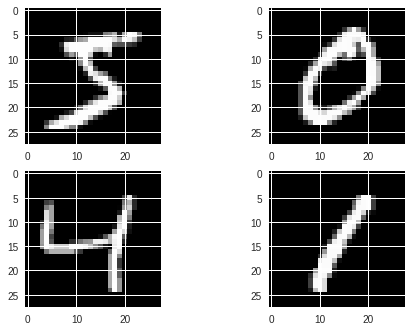

[5 0 4 1]


In [8]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.subplot(221)
plt.imshow(x_train[0].reshape([28,28]), cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1].reshape([28,28]), cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2].reshape([28,28]), cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3].reshape([28,28]), cmap=plt.get_cmap('gray'))

plt.show()

print(y_train[:4])  # <---labels

In [3]:

num_classes = 10
# input image dimensions
img_rows, img_cols = 28, 28

In [4]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [7]:
batch_size = 128
epochs = 12

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 200us/step - loss: 0.2685 - acc: 0.9174 - val_loss: 0.0660 - val_acc: 0.9783
Epoch 2/12
60000/60000 [==============================] - 10s 169us/step - loss: 0.0949 - acc: 0.9710 - val_loss: 0.0480 - val_acc: 0.9836
Epoch 3/12
29312/60000 [=============>................] - ETA: 4s - loss: 0.0686 - acc: 0.9796

60000/60000 [==============================] - 10s 167us/step - loss: 0.0702 - acc: 0.9793 - val_loss: 0.0371 - val_acc: 0.9872
Epoch 4/12
60000/60000 [==============================] - 10s 167us/step - loss: 0.0564 - acc: 0.9833 - val_loss: 0.0317 - val_acc: 0.9894
Epoch 5/12
60000/60000 [==============================] - 10s 168us/step - loss: 0.0506 - acc: 0.9853 - val_loss: 0.0322 - val_acc: 0.9899
Epoch 6/12
  896/60000 [..............................] - ETA: 9s - loss: 0.0332 - acc: 0.9922 

60000/60000 [==============================] - 10s 169us/step - loss: 0.0441 - acc: 0.9870 - val_loss: 0.0286 - val_acc: 0.9908
Epoch 7/12
60000/60000 [==============================] - 10s 168us/step - loss: 0.0410 - acc: 0.9877 - val_loss: 0.0256 - val_acc: 0.9917
Epoch 8/12
55040/60000 [==========================>...] - ETA: 0s - loss: 0.0365 - acc: 0.9891

60000/60000 [==============================] - 10s 167us/step - loss: 0.0370 - acc: 0.9889 - val_loss: 0.0270 - val_acc: 0.9912
Epoch 9/12
60000/60000 [==============================] - 10s 168us/step - loss: 0.0343 - acc: 0.9896 - val_loss: 0.0283 - val_acc: 0.9907
Epoch 10/12
60000/60000 [==============================] - 10s 168us/step - loss: 0.0320 - acc: 0.9903 - val_loss: 0.0300 - val_acc: 0.9912
Epoch 11/12
 4352/60000 [=>............................] - ETA: 8s - loss: 0.0315 - acc: 0.9906

60000/60000 [==============================] - 10s 167us/step - loss: 0.0287 - acc: 0.9913 - val_loss: 0.0259 - val_acc: 0.9921
Epoch 12/12
60000/60000 [==============================] - 10s 168us/step - loss: 0.0295 - acc: 0.9908 - val_loss: 0.0303 - val_acc: 0.9905
Test loss: 0.03026454620273671
Test accuracy: 0.9905


# Quickdraw Dataset

In [55]:
! apt-get install git-lfs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 7 not upgraded.
Need to get 2,094 kB of archives.
After this operation, 7,545 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful/universe amd64 git-lfs amd64 2.2.1-1 [2,094 kB]
Fetched 2,094 kB in 1s (1,521 kB/s)
Selecting previously unselected package git-lfs.
(Reading database ... 18396 files and directories currently installed.)
Preparing to unpack .../git-lfs_2.2.1-1_amd64.deb ...
Unpacking git-lfs (2.2.1-1) ...
Setting up git-lfs (2.2.1-1) ...


In [56]:
! git lfs install

Updated git hooks.
Git LFS initialized.


In [65]:
! git clone https://github.com/krohak/load-quickdraw.git

Cloning into 'load-quickdraw'...
remote: Counting objects: 16, done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 16 (delta 0), reused 16 (delta 0), pack-reused 0
Unpacking objects: 100% (16/16), done.
Checking out files: 100% (13/13), done.


In [66]:
cd load-quickdraw/

full%2Fnumpy_bitmap%2Fairplane.npy    full%2Fnumpy_bitmap%2Fmotorbike.npy
full%2Fnumpy_bitmap%2Fcarrot.npy      full%2Fnumpy_bitmap%2Fsaxophone.npy
full%2Fnumpy_bitmap%2Fcup.npy	      full%2Fnumpy_bitmap%2Ftelevision.npy
full%2Fnumpy_bitmap%2Fheadphones.npy  full%2Fnumpy_bitmap%2Fumbrella.npy
full%2Fnumpy_bitmap%2Flight bulb.npy  full%2Fnumpy_bitmap%2Fzigzag.npy


In [71]:
ls

data/  load_data.ipynb  load_data.py


In [0]:
# coding: utf-8

# In[4]:


import numpy as np
from sklearn.model_selection import train_test_split
from os import walk, getcwd
import h5py


# In[8]:


mypath = "data/"
txt_name_list = []
for (dirpath, dirnames, filenames) in walk(mypath):
    if filenames != '.DS_Store':       
        txt_name_list.extend(filenames)
        break


# In[9]:


txt_name_list


# In[10]:


x_train = []
x_test = []
y_train = []
y_test = []
xtotal = []
ytotal = []
slice_train = int(80000/len(txt_name_list))  ###Setting value to be 80000 for the final dataset
i = 0
seed = np.random.randint(1, 10e6)


# In[14]:


##Creates test/train split with quickdraw data
for txt_name in txt_name_list:
    txt_path = mypath + txt_name
    x = np.load(txt_path)
    print(txt_path)
    x = x.astype('float32') / 255.    ##scale images
    y = [i] * len(x)  
    np.random.seed(seed)
    np.random.shuffle(x)
    np.random.seed(seed)
    np.random.shuffle(y)
    x = x[:slice_train]
    y = y[:slice_train]
    if i != 0: 
        xtotal = np.concatenate((x,xtotal), axis=0)
        ytotal = np.concatenate((y,ytotal), axis=0)
    else:
        xtotal = x
        ytotal = y
    i += 1
x_train, x_test, y_train, y_test = train_test_split(xtotal, ytotal, test_size=0.2, random_state=42)


# In[13]:


##Saves this out as hdf5 format
data_to_write = x_test
with h5py.File('x_test.h5', 'w') as hf:
    hf.create_dataset("name-of-dataset",  data=data_to_write)
data_to_write = x_train
with h5py.File('x_train.h5', 'w') as hf:
    hf.create_dataset("name-of-dataset",  data=data_to_write)
data_to_write = y_test
with h5py.File('y_test.h5', 'w') as hf:
    hf.create_dataset("name-of-dataset",  data=data_to_write)
data_to_write = y_train
with h5py.File('y_train.h5', 'w') as hf:
    hf.create_dataset("name-of-dataset",  data=data_to_write)

In [9]:
ls

data/            load_data.py  x_train.h5  y_train.h5
load_data.ipynb  x_test.h5     y_test.h5


In [12]:
y_test.max()

9

In [13]:
x_train[0].shape

(784,)

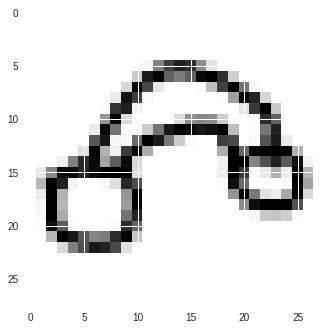

In [14]:
import matplotlib.pyplot as plt
import numpy as np

img = x_train[0].reshape([28,28])
plt.imshow(img)

In [15]:
y_train[0]

9

In [0]:
num_classes = 10
# input image dimensions
img_rows, img_cols = 28, 28

In [0]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [18]:
x_train.shape

(64000, 28, 28, 1)

In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [23]:
batch_size = 128
epochs = 20

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 64000 samples, validate on 16000 samples
Epoch 1/20
64000/64000 [==============================] - 11s 166us/step - loss: 0.1598 - acc: 0.9489 - val_loss: 0.2147 - val_acc: 0.9407
Epoch 2/20
64000/64000 [==============================] - 11s 168us/step - loss: 0.1549 - acc: 0.9496 - val_loss: 0.1995 - val_acc: 0.9412
Epoch 3/20
25088/64000 [==========>...................] - ETA: 6s - loss: 0.1465 - acc: 0.9529

64000/64000 [==============================] - 11s 168us/step - loss: 0.1508 - acc: 0.9523 - val_loss: 0.1956 - val_acc: 0.9385
Epoch 4/20
64000/64000 [==============================] - 11s 167us/step - loss: 0.1489 - acc: 0.9526 - val_loss: 0.2430 - val_acc: 0.9402
Epoch 5/20
56832/64000 [=========================>....] - ETA: 1s - loss: 0.1465 - acc: 0.9531

64000/64000 [==============================] - 11s 167us/step - loss: 0.1466 - acc: 0.9531 - val_loss: 0.2194 - val_acc: 0.9399
Epoch 6/20
64000/64000 [==============================] - 11s 167us/step - loss: 0.1409 - acc: 0.9554 - val_loss: 0.2200 - val_acc: 0.9412
Epoch 7/20
64000/64000 [==============================] - 11s 167us/step - loss: 0.1422 - acc: 0.9543 - val_loss: 0.1984 - val_acc: 0.9414


Epoch 8/20
64000/64000 [==============================] - 11s 167us/step - loss: 0.1416 - acc: 0.9550 - val_loss: 0.2219 - val_acc: 0.9407
Epoch 9/20
64000/64000 [==============================] - 11s 167us/step - loss: 0.1380 - acc: 0.9548 - val_loss: 0.2129 - val_acc: 0.9405
Epoch 10/20
45824/64000 [====================>.........] - ETA: 2s - loss: 0.1366 - acc: 0.9557

64000/64000 [==============================] - 11s 166us/step - loss: 0.1371 - acc: 0.9551 - val_loss: 0.1943 - val_acc: 0.9419
Epoch 11/20
64000/64000 [==============================] - 11s 168us/step - loss: 0.1378 - acc: 0.9558 - val_loss: 0.1929 - val_acc: 0.9413
Epoch 12/20
61184/64000 [===========================>..] - ETA: 0s - loss: 0.1327 - acc: 0.9577

64000/64000 [==============================] - 11s 167us/step - loss: 0.1336 - acc: 0.9576 - val_loss: 0.1996 - val_acc: 0.9388
Epoch 13/20
64000/64000 [==============================] - 11s 167us/step - loss: 0.1345 - acc: 0.9572 - val_loss: 0.2056 - val_acc: 0.9423
Epoch 14/20
64000/64000 [==============================] - 11s 167us/step - loss: 0.1301 - acc: 0.9586 - val_loss: 0.2332 - val_acc: 0.9429


Epoch 15/20
64000/64000 [==============================] - 11s 168us/step - loss: 0.1314 - acc: 0.9575 - val_loss: 0.2445 - val_acc: 0.9426
Epoch 16/20
64000/64000 [==============================] - 11s 167us/step - loss: 0.1318 - acc: 0.9578 - val_loss: 0.2046 - val_acc: 0.9424
Epoch 17/20
45056/64000 [====================>.........] - ETA: 2s - loss: 0.1300 - acc: 0.9581

64000/64000 [==============================] - 11s 167us/step - loss: 0.1315 - acc: 0.9577 - val_loss: 0.2023 - val_acc: 0.9422
Epoch 18/20
64000/64000 [==============================] - 11s 166us/step - loss: 0.1299 - acc: 0.9583 - val_loss: 0.2041 - val_acc: 0.9394
Epoch 19/20
61184/64000 [===========================>..] - ETA: 0s - loss: 0.1293 - acc: 0.9582

64000/64000 [==============================] - 11s 168us/step - loss: 0.1291 - acc: 0.9583 - val_loss: 0.2151 - val_acc: 0.9421
Epoch 20/20
64000/64000 [==============================] - 11s 167us/step - loss: 0.1299 - acc: 0.9593 - val_loss: 0.2350 - val_acc: 0.9424
Test loss: 0.23503756526055805
Test accuracy: 0.942375
